# Power Outages
This project uses major power outage data in the continental U.S. from January 2000 to July 2016. Here, a major power  outage is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300MW. Interesting questions to consider include:
- Where and when do major power outages tend to occur?
- What are the characteristics of major power outages with higher severity? Variables to consider include location, time, climate, land-use characteristics, electricity consumption patterns, economic characteristics, etc. What risk factors may an energy company want to look into when predicting the location and severity of its next major power outage?
- What characteristics are associated with each category of cause?
- How have characteristics of major power outages changed over time? Is there a clear trend?

### Getting the Data
The data is downloadable [here](https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks).

A data dictionary is available at this [article](https://www.sciencedirect.com/science/article/pii/S2352340918307182) under *Table 1. Variable descriptions*.

### Cleaning and EDA
- Note that the data is given as an Excel file rather than a CSV. Open the data in Excel or another spreadsheet application and determine which rows and columns of the Excel spreadsheet should be ignored when loading the data in pandas.
- Clean the data.
    - The power outage start date and time is given by `OUTAGE.START.DATE` and `OUTAGE.START.TIME`. It would be preferable if these two columns were combined into one datetime column. Combine `OUTAGE.START.DATE` and `OUTAGE.START.TIME` into a new datetime column called `OUTAGE.START`. Similarly, combine `OUTAGE.RESTORATION.DATE` and `OUTAGE.RESTORATION.TIME` into a new datetime column called `OUTAGE.RESTORATION`.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

*Hint 1: pandas can load multiple filetypes: `pd.read_csv`, `pd.read_excel`, `pd.read_html`, `pd.read_json`, etc.*

*Hint 2: `pd.to_datetime` and `pd.to_timedelta` will be useful here.*

*Tip: To visualize geospatial data, consider [Folium](https://python-visualization.github.io/folium/) or another geospatial plotting library.*

### Assessment of Missingness
- Assess the missingness of a column that is not missing by  design.

### Hypothesis Test
Find a hypothesis test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
In this project, we explore the major power outage data in the continental U.S. from January 2000 to July 2016. The data set shows the number of outrages from each States and describes the reasons for them to happen. This data set also carries out some ordinary variables such as how many customers are affected due to the outage and the duration for each outage. Individually, we want to find out if the value of duration is longer if the outage starts at night. Thus, we sets up a hypothesis test regarding to it and see if there is any significance evidence to prove our null hypothesis

### Cleaning and EDA
At the first glance from this dataset, we realized the necessity of doing data cleaning. For example, the column names are meaningless and the first few rows are either messy or containing all nan values. From our observation, we explore that the variable names and the unit of variables are provided in the rows. We also reformat the date and time columns to be one column containing both the date and time and set them to datatime object.
In exploratory data analysis, we first drew a scatterplot of the peak power loss in MW over years and a barplot of counts of the cause of each outages by category over years. Then, we visualized the duration of outrage by boxplot and histogram and concluded that most of the durations are not high. We also explored the number of customers effected by outages. Later, we carry out an OLS model to check whether TOTAL.CUSTOMERS and CUSTOMERS.AFFECTED have strong correlation or not, from which surprisingly we discovered that the correlation between these two variables are very low.

### Assessment of Missingness
Dependence: We select the column OUTAGE.START which contains the starting time of each outage. We compare this column with the YEAR column to see if OUTAGE.START is NMAR or MAR. We observed that the null values in OUTAGE.START existed mostly before the YEAR 2007. Therefore, the missing values of OUTAGE.START might be a MAR. We run this simulation 1000 times and get a p-value 0.00, by comparing it with the significane level of 0.05, we conclude that there is significance evidence that OUTAGE.START is MAR which implies it is depedent on YEAR.

Nondependence: We select the column OUTAGE.DURATION which indicates the duration of each outage. We compare this column with the U.S.STATE to check if the outage duration is missing more in specific US States. By only looking at the columns and missing values, we believe that the missing values have nothing to do with different US States. Thus, we perform a permutation test to compare the TVD between the null values of OUTAGE.DURATION and the (shuffled / non shuffled) columns of U.S.STATE. After running this simulation 1000 times and get a p-value 0.251, we concluded that there the missingness of OURAGE.DURATION is nondependence to the U.S.STATE.

### Hypothesis Test
Our test hypothesis is that

    H0: Average power outages duration is equal when it occurs during the day and night. 
    H1: Average power outages duration is longer when it occurs during the night. (8 pm to 4 am)
    
We set the significance level to be 0.05 to decide whether we should reject our null hypothesis or not. We perform a hypothesis test by running 1000 test statistics which we randomly shuffled the day and night.We obtain a p-value of 0.127 and by comapring with the significance level 0.05, we fail to reject the null hypothesis and conluced that there is not enough evidence to say that average power outages duration is longer when it occurs during the night.

# Code


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA
It is vital for us to do data cleaning before performing EDA and further testing since the original data contains invalid column names and some invalid rows.

In [3]:
#Read in Excel file
df = pd.read_excel('outage.xlsx')
df.head()

,Major power outage events in the continental U.S.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,Time period: January 2000 - July 2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Regions affected: Outages reported in this dat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND


In [4]:
# Get all the variables
variables = df.loc[4]
# Set the column names to variables
df.columns = variables
# Extract the units for the variables
units = df.loc[5].values[1:]
# Drop the useless columns 
df = df.drop([0, 1, 2, 3, 4, 5])
df = df.drop(columns = 'variables')
# Reset the index
df = df.reset_index(drop = True)

# Combine OUTAGE START DATE and OUTAGE START TIME to one column
df['OUTAGE.START'] = pd.to_datetime(df['OUTAGE.START.DATE'].apply(lambda x: str(x)) + " " + df['OUTAGE.START.TIME'].apply(lambda x: str(x)), errors='coerce')
# Combine OUTAGE RESTORATION DATE and OUTAGE RESTORATION TIME to one column
df['OUTAGE.RESTORATION'] = pd.to_datetime(df['OUTAGE.RESTORATION.DATE'].apply(lambda x: str(x)) + " " + df['OUTAGE.RESTORATION.TIME'].apply(lambda x: str(x)), errors='coerce')

# Drop the orginial columns 
df = df.drop(columns = ['OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'OUTAGE.RESTORATION.DATE','OUTAGE.RESTORATION.TIME' ])

df.head(10)


4,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,CAUSE.CATEGORY,...,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,OUTAGE.START,OUTAGE.RESTORATION
0,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,severe weather,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2011-07-01 17:00:00,2011-07-03 20:00:00
1,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,intentional attack,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2014-05-11 18:38:00,2014-05-11 18:39:00
2,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,severe weather,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2010-10-26 20:00:00,2010-10-28 22:00:00
3,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,severe weather,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2012-06-19 04:30:00,2012-06-20 23:00:00
4,5,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,severe weather,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2015-07-18 02:00:00,2015-07-19 07:00:00
5,6,2010,11,Minnesota,MN,MRO,East North Central,-1.4,cold,severe weather,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2010-11-13 15:00:00,2010-11-14 22:00:00
6,7,2010,7,Minnesota,MN,MRO,East North Central,-0.9,cold,severe weather,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2010-07-17 20:30:00,2010-07-19 22:00:00
7,8,2005,6,Minnesota,MN,MRO,East North Central,0.2,normal,severe weather,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2005-06-08 04:00:00,2005-06-10 22:00:00
8,9,2015,3,Minnesota,MN,MRO,East North Central,0.6,warm,intentional attack,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2015-03-16 07:31:00,2015-03-16 10:06:00
9,10,2013,6,Minnesota,MN,MRO,East North Central,-0.2,normal,severe weather,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2013-06-21 17:39:00,2013-06-24 06:00:00


We now perform a boxplot to see how long the outrage duration usually were.

<AxesSubplot:xlabel='OUTAGE.DURATION'>

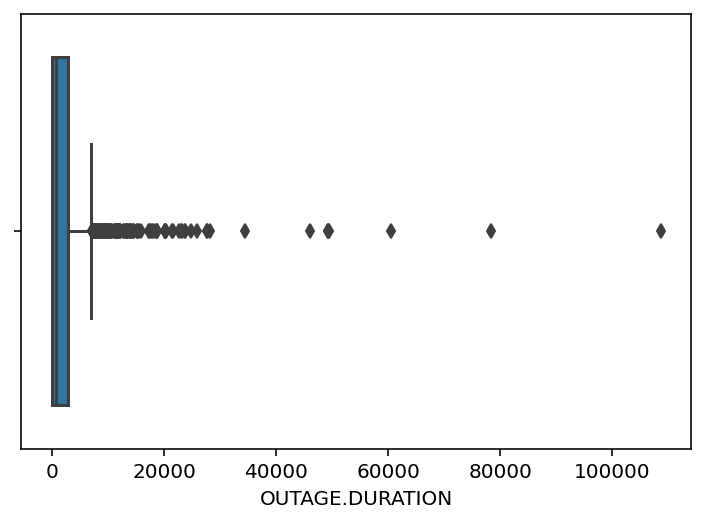

In [6]:
# Boxplot for outrage duration
sns.boxplot(x = df['OUTAGE.DURATION'])

From the boxplot above, we can see that most of the data are cluster at the left end of the plot. Howeverm the range of the data is significant large due to the outliers. To have a better look on how the distribution of the data without these outlier looks like, we now perform histograms of the same dataset wihtout these outliers.

<AxesSubplot:xlabel='OUTAGE.DURATION', ylabel='Count'>

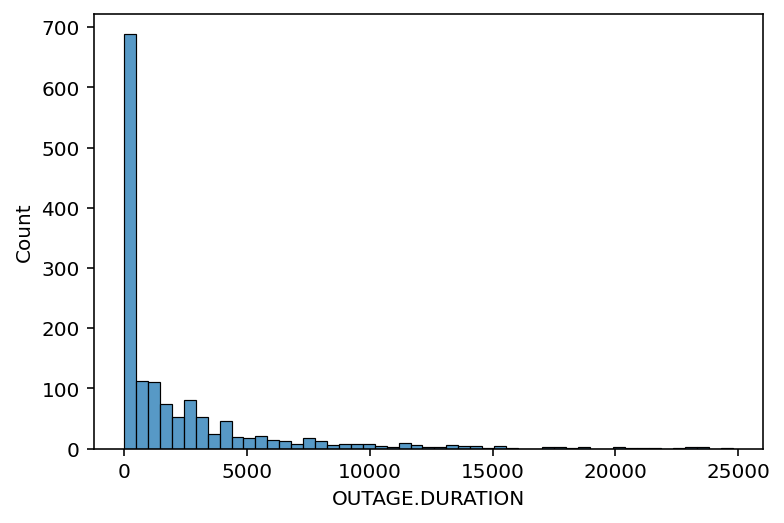

In [7]:
# Histogram omitting outliers
sns.histplot(data=df[df['OUTAGE.DURATION'] < 25000], x="OUTAGE.DURATION")

The histogram clearly shows the right-skewed distribution which demonstrated how the duration of outrage is usually not that long.

Noticing that lots of the duration of outrage are not long, we will like to see how these outrages effect the customer.

<AxesSubplot:xlabel='CUSTOMERS.AFFECTED'>

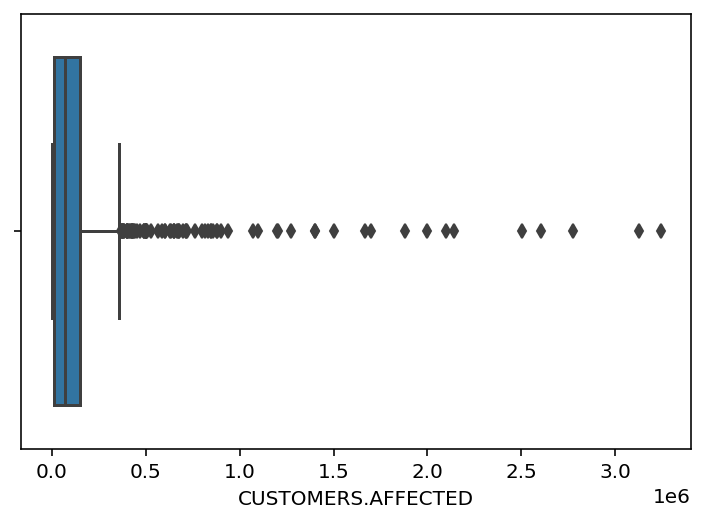

In [8]:
# Boxplot for customer effect
sns.boxplot(x = df['CUSTOMERS.AFFECTED'])

Again the above boxplot shows that there are a lot of outliers with most of the dataset cluster in the left-hand side of the boxplot. Thus, we perform the histogram for the same dataset but omitting the outliers.

<AxesSubplot:xlabel='CUSTOMERS.AFFECTED', ylabel='Count'>

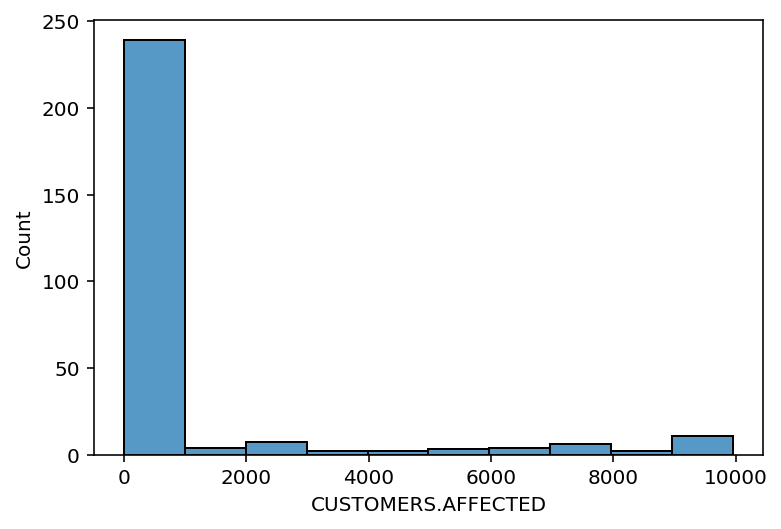

In [9]:
# Histogram omitting outliers
sns.histplot(data=df[df['CUSTOMERS.AFFECTED'] < 10000], x="CUSTOMERS.AFFECTED")


Again, we can see a right-skewed distribution in this histrogram which implies that the customers that were affected by the outage were not significantly large.

Getting deeper, we performed ordinary least squares to see if TOTAL CUSTOMERS and CUSTOMERS.AFFECTED have some correlation. OLS estimates a multi-variate regression model and provides a variety of fit-statistics

In [40]:
# Import OLS statsmodel 
import statsmodels.api as sm
# Drop nan values in boht TOTAL.CUSTOMERS and CUSTOMERS.AFFECTED columns
cleaned_df = df.dropna(subset=['TOTAL.CUSTOMERS', 'CUSTOMERS.AFFECTED'])
Y = np.array(cleaned_df['CUSTOMERS.AFFECTED'],dtype=float)
X = np.array(cleaned_df['TOTAL.CUSTOMERS'], dtype=float)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     31.25
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.87e-08
Time:                        12:06:02   Log-Likelihood:                -15243.
No. Observations:                1091   AIC:                         3.049e+04
Df Residuals:                    1089   BIC:                         3.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.012e+04   1.42e+04      5.639      0.0

We find out that these two variables have very less correlation wiht the R-squared to be 0.028 which is quite amusing since we originaly belive that if there are more total customers, then the customers who got affected by the outage should be higher.

Below, we plotted a scatterplot to check how peak demand loss various over years and found out that majority of the outages are relatively small in comparison to few rare dramatic events, which matches our expectation.

Text(0.5, 1.0, 'Peak Demand loss vs Time')

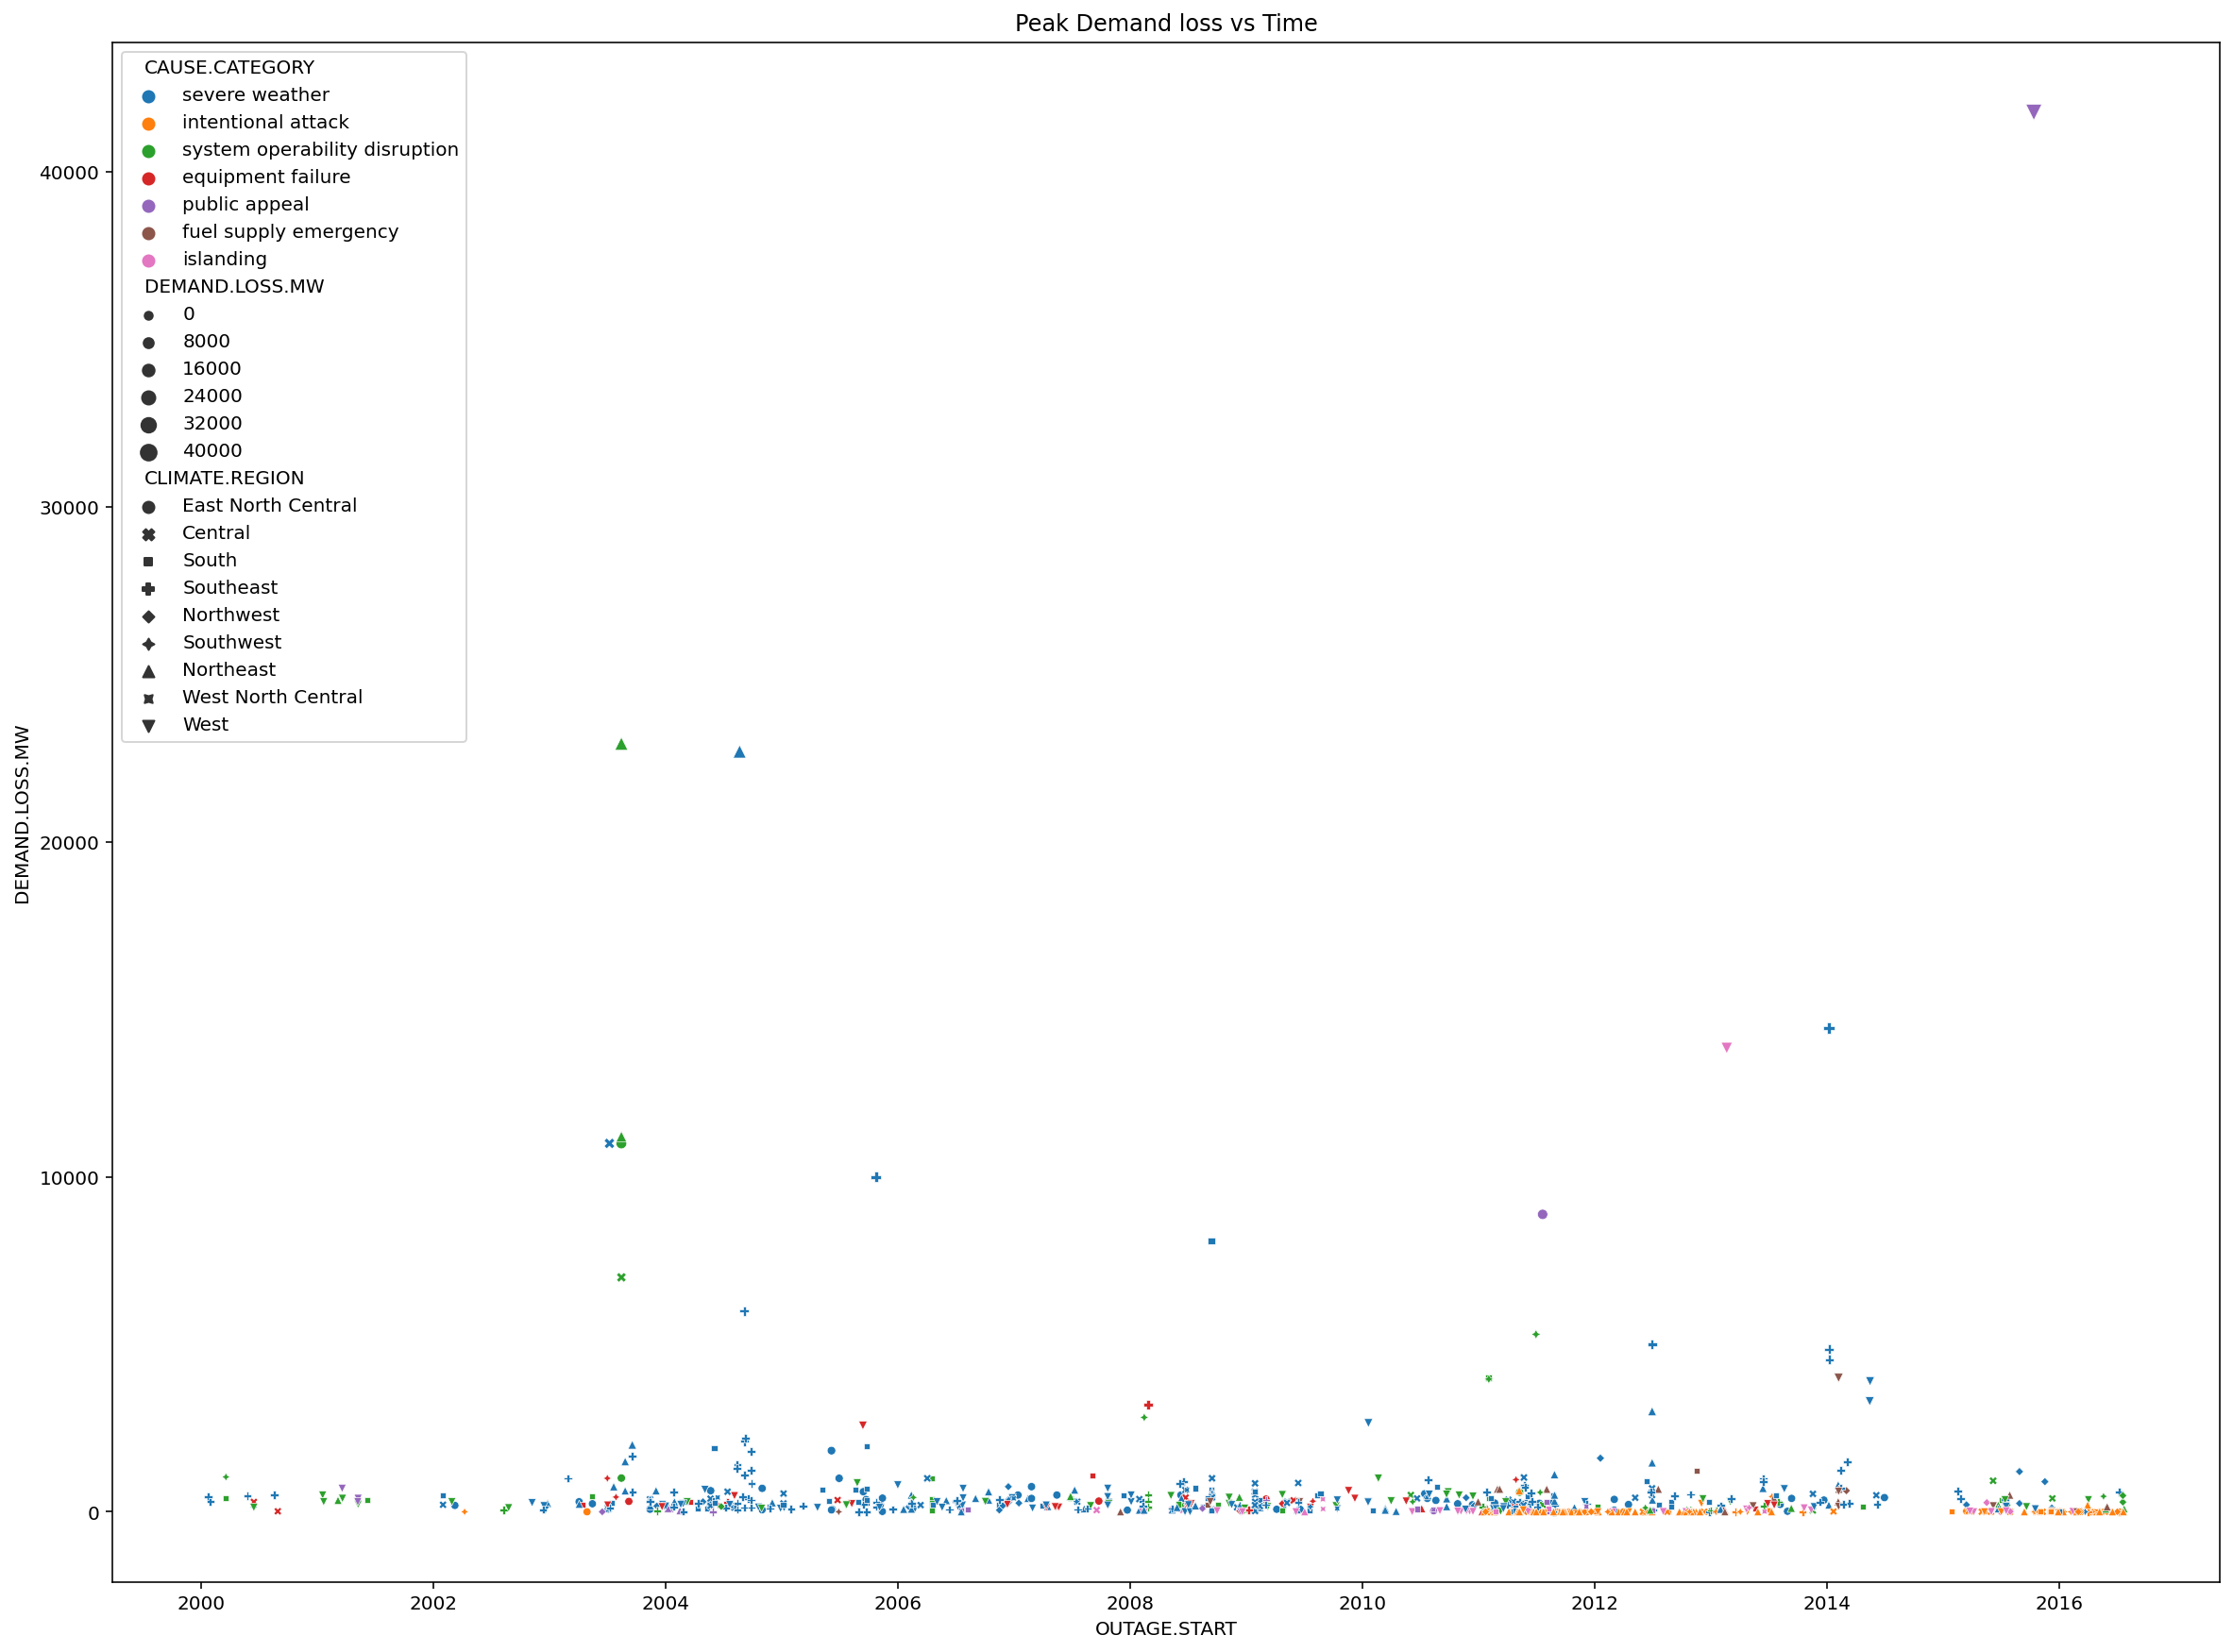

In [6]:
eda1 = df[["OUTAGE.START", "DEMAND.LOSS.MW", 'CAUSE.CATEGORY', 'CLIMATE.REGION']]
dims = (20, 15)
fig, ax = plt.subplots(figsize=dims)

sns.scatterplot(data = eda1, x="OUTAGE.START", y="DEMAND.LOSS.MW" , hue = 'CAUSE.CATEGORY', 
                style="CLIMATE.REGION", size = "DEMAND.LOSS.MW", ax=ax).set_title('Peak Demand loss vs Time')

We then draw a barplot of frequency of power outages by category over years to checkl if there is any interesting trends and we indeed find something veyr interesting such as before 2011, severe weather is the main cause and, after 2010, intentional attacks became another main cause. 

Text(0.5, 1.0, 'What causes a Power Outage')

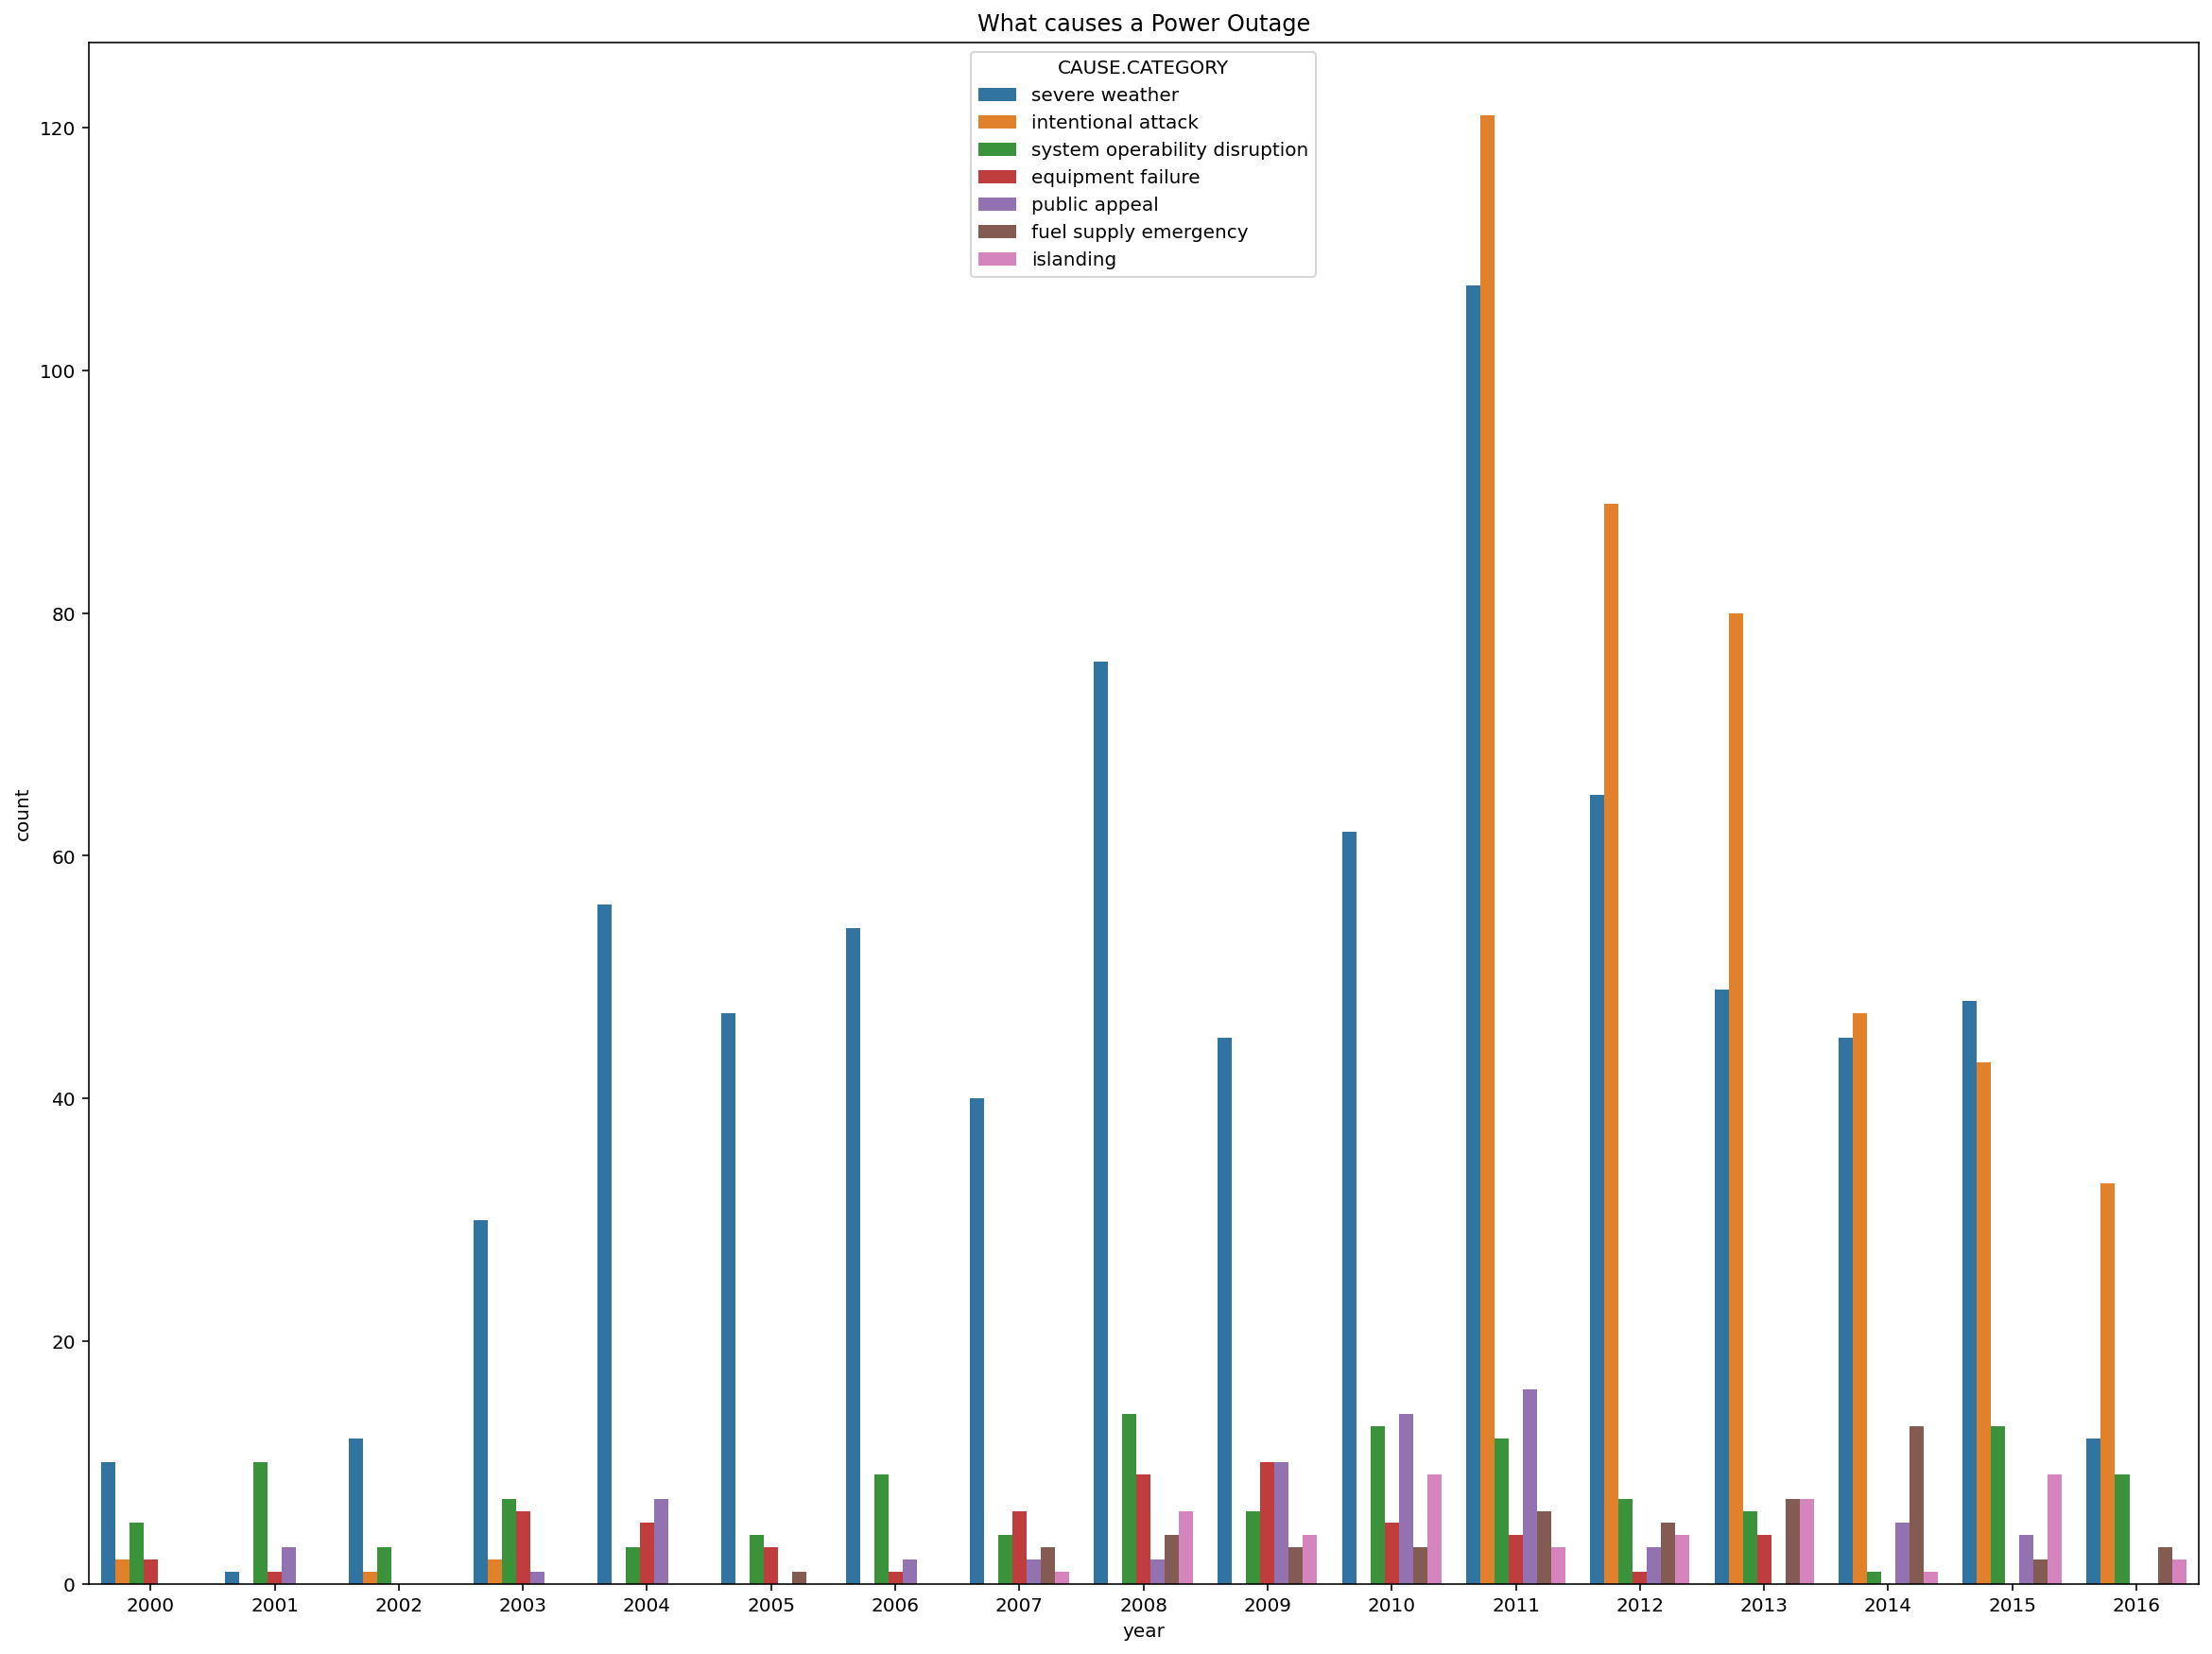

In [5]:
eda2 = df[["OUTAGE.START", 'CAUSE.CATEGORY']]
eda2 = eda2.dropna()
eda2['year'] = eda2["OUTAGE.START"].dt.year
eda2['count'] = eda2.groupby(['CAUSE.CATEGORY', 'year'])['CAUSE.CATEGORY'].transform('count')

dims = (20, 15)
fig, ax = plt.subplots(figsize=dims)

sns.barplot(data = eda2, x="year", y="count", hue="CAUSE.CATEGORY", ax=ax).set_title('What causes a Power Outage')

### Assessment of Missingness

In [12]:
# check the how many columns have missingness over the whole dataframe
df_missingness = df.loc[:, df.isnull().any()]
len(df_missingness)

1534

In [13]:
# enumerate all columns with missing values
df_missingness.columns

Index(['MONTH', 'CLIMATE.REGION', 'ANOMALY.LEVEL', 'CLIMATE.CATEGORY',
       'CAUSE.CATEGORY.DETAIL', 'HURRICANE.NAMES', 'OUTAGE.DURATION',
       'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED', 'RES.PRICE', 'COM.PRICE',
       'IND.PRICE', 'TOTAL.PRICE', 'RES.SALES', 'COM.SALES', 'IND.SALES',
       'TOTAL.SALES', 'RES.PERCEN', 'COM.PERCEN', 'IND.PERCEN', 'POPDEN_UC',
       'POPDEN_RURAL', 'OUTAGE.START', 'OUTAGE.RESTORATION'],
      dtype='object', name=4)

In [14]:
# check the missingness in column 'OUTAGE.START'

time_missingness = df.loc[pd.isnull(df['OUTAGE.START'])]
len(time_missingness)

9

In [15]:
# check the missingness in column 'YEAR'

time_missingness = df.loc[pd.isnull(df['YEAR'])]
len(time_missingness)

0

As we found that we only had 9 missing values for the 'OUTAGE.START' column, which indicates the starting time, 
we decided to just drop them for our analysis. 
Here, we believe it is MAR as the year of the entry might help better predict whether column is missing any values.
The reason for that, we speculate, is that though it (0.6%) really is a small portion of my column values mssing and it really seems that is depedent on year, 
it will still be good if we can check numerically about how likely this event happens. 

We make the following hypothesis: 

    # H0: The null value occurs equally frequently before (2000 - 2006) and after 2007 
    # H1: The null values occurs mainly before 2007. (2000 - 2006)
    # (with p-value = 0.05)
    
We randomly perumute the Year column to counts null values to check how many null values will normally land before 2006. 



In [18]:
miss1 = df[['YEAR', 'OUTAGE.START']]
miss1['time_isnull'] = miss1['OUTAGE.START'].isnull()

miss1

<ipython-input-18-357a60c04ea2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss1['time_isnull'] = miss1['OUTAGE.START'].isnull()


4,YEAR,OUTAGE.START,time_isnull
0,2011,2011-07-01 17:00:00,False
1,2014,2014-05-11 18:38:00,False
2,2010,2010-10-26 20:00:00,False
3,2012,2012-06-19 04:30:00,False
4,2015,2015-07-18 02:00:00,False
...,...,...,...
1529,2011,2011-12-06 08:00:00,False
1530,2006,NaT,True
1531,2009,2009-08-29 22:54:00,False
1532,2009,2009-08-29 11:00:00,False


In [35]:
n_repetitions = 1000

obs = len(df.loc[pd.isnull(df['OUTAGE.START'])])
miss1['YEAR'] = miss1['YEAR'].astype(int)
before_2007 = []
for _ in range(n_repetitions):
    
    # shuffle the Year
    shuffled_years = (
        miss1['YEAR']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        miss1
        .assign(**{'Shuffled Year': shuffled_years})
    )
    
    # compute the count of null that belong to year before 2007
    count = sum((shuffled['Shuffled Year']<2007) & shuffled['time_isnull'])
    
    # add it to the list of results
    before_2007.append(count)

<ipython-input-35-b0a8ca44bb62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss1['YEAR'] = miss1['YEAR'].astype(int)


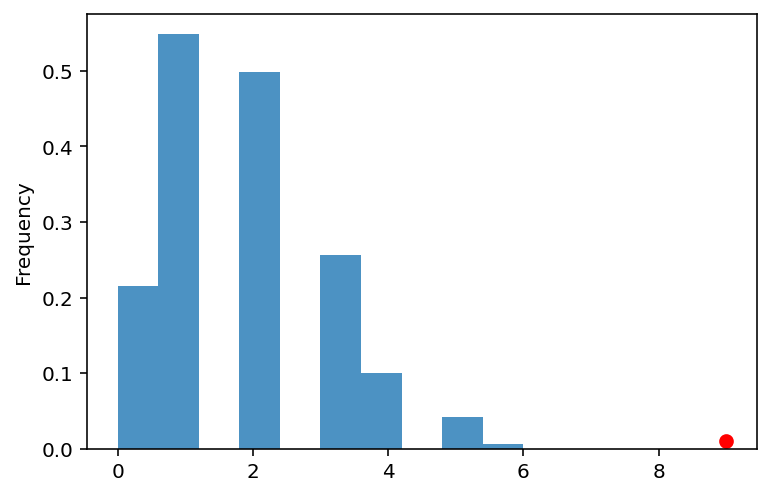

In [36]:
#: visualize
pd.Series(before_2007).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(obs, 0.01, color='red', s=40, zorder=2);

In [21]:
p_value = np.count_nonzero(np.array(before_2007) >= obs) / n_repetitions
p_value

0.0

From the graph, we can conclude that this is two is highly likely dependent as p-value is 0 when we only ran 1000 simulations. 

In [23]:
# Then, we check the missingness in column 'OUTAGE.DURATION'

time_missingness = df.loc[pd.isnull(df['OUTAGE.DURATION'])]
len(time_missingness)

58

As we found that we had 58 missing values for the 'OUTAGE.DURATION' column, which indicates the duration of each outage. Here, we believe that the missingness of OUTAGE.DURATION has nothing to do with the column 'U.S.STATE'. Specifically saying, we are checking if the outage duration is missing more in specific US States.

Below, we run permuation check to verify our claim.

In [20]:
#CHECK FOR NO DEPDENDENCE in column 'OUTAGE.DURATION'
def perm4missing(df, col, N):
    dist = df.assign(is_null = df['OUTAGE.DURATION'].isnull()).pivot_table(index = 'is_null', columns = col, aggfunc='size').apply(lambda x:x/x.sum(), axis=1)
    #dist.T.plot(kind='bar') 
    
    tvds = [] #tvds array
    
    #simulations
    for _ in range(N):
        
        #shuffle the col column
        shuffled_col = df[col].sample(replace=False, frac=1).reset_index(drop=True)
        
        #put into a new table with shuffled values
        shuffled = df.assign(**{col: shuffled_col, 'is_null':df['OUTAGE.DURATION'].isnull()})
        
        #compute TVD
        shuffled = shuffled.pivot_table(index='is_null', columns = col, aggfunc='size').apply(lambda x:x/x.sum(), axis=1)
        #shuffled.T.plot(kind='bar')
        tvd=shuffled.diff().iloc[-1].abs().sum()/2
        
        #append to array 
        tvds.append(tvd)
    
    #calculate observed value 
    obs = dist.diff().iloc[-1].abs().sum()/2
    
    #calculate pvalue
    pval = np.mean(tvds >= obs)
    #VISUALIZE PVALUE 
    plot2 = plt.scatter(obs,0,color='red', s=100)
    plot = pd.Series(tvds).plot(kind='hist', density=True, alpha=.8, title = 'P-Value: Is OUTAGE.DURATION missingness dependent on U.S._STATE')
   
    return pval

0.251

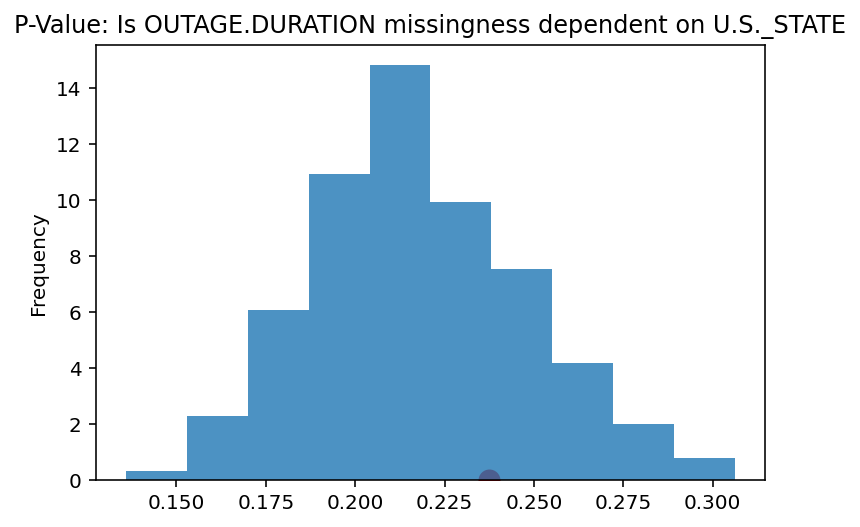

In [22]:
perm4missing(df, 'U.S._STATE', 1000)

From the graph, we can conclude that OUTAGE.DURATION is highly not dependent to U.S.STATE as p-value is 0.251 (>0.05) when we ran 1000 simulations. 

We can also check which other variables were dependent or not dependent to the missingness of OUTAGE.DURATION.

In [9]:
# get the column names of all, except outage

columns = df.columns.tolist()
columns.remove('OUTAGE.DURATION')
result = {}
for col in columns:
    res = perm4missing(df, col, 1000)
    result[col] = res

As we can see from below, many other variables were also not dependent to the missingness of OUTAGE.DURATION.

In [15]:
# print out all column with p-value larger than 0.05 which indicates nondependence
for col, p in result.items():  
    if p > 0.05:
        print(col + ' has p-value ' + str(p))

OBS has p-value 1.0
MONTH has p-value 0.099
U.S._STATE has p-value 0.236
POSTAL.CODE has p-value 0.246
HURRICANE.NAMES has p-value 1.0
DEMAND.LOSS.MW has p-value 0.286
RES.PRICE has p-value 0.077
COM.PRICE has p-value 0.094
TOTAL.PRICE has p-value 0.269
RES.SALES has p-value 0.363
COM.SALES has p-value 0.362
IND.SALES has p-value 0.392
TOTAL.SALES has p-value 0.371
RES.PERCEN has p-value 0.4
COM.PERCEN has p-value 0.395
IND.PERCEN has p-value 0.35
RES.CUSTOMERS has p-value 0.952
COM.CUSTOMERS has p-value 0.957
IND.CUSTOMERS has p-value 0.914
TOTAL.CUSTOMERS has p-value 0.953
RES.CUST.PCT has p-value 0.955
COM.CUST.PCT has p-value 0.957
IND.CUST.PCT has p-value 0.964
PC.REALGSP.STATE has p-value 0.907
PC.REALGSP.REL has p-value 0.916
PC.REALGSP.CHANGE has p-value 0.086
UTIL.REALGSP has p-value 0.964
TOTAL.REALGSP has p-value 0.958
UTIL.CONTRI has p-value 0.95
PI.UTIL.OFUSA has p-value 0.091
POPULATION has p-value 0.956
POPPCT_URBAN has p-value 0.255
POPPCT_UC has p-value 0.262
POPDEN_UR

### Hypothesis Test

We set up a hypothesis test with a significance level of 0.05 saying that:
    
    # H0: Average power outages duration is equal when it occurs during the day and night. 
    # H1: Average power outages duration is longer when it occurs during the night. (8 pm to 4 am)

In [11]:
# Drop nan values in OUTAGE.START and OUTAGE.DURATION
data = df[['OUTAGE.START', 'OUTAGE.DURATION']].dropna()
# Adding a new column with the outage started hour
data['Time_of_day'] = data['OUTAGE.START'].dt.hour
# Convert the type of year to int
data['OUTAGE.DURATION'] = data['OUTAGE.DURATION'].astype('int')
data

4,OUTAGE.START,OUTAGE.DURATION,Time_of_day
0,2011-07-01 17:00:00,3060,17
1,2014-05-11 18:38:00,1,18
2,2010-10-26 20:00:00,3000,20
3,2012-06-19 04:30:00,2550,4
4,2015-07-18 02:00:00,1740,2
...,...,...,...
1526,2016-03-08 00:00:00,0,0
1528,2016-07-19 15:45:00,220,15
1529,2011-12-06 08:00:00,720,8
1531,2009-08-29 22:54:00,59,22


In [27]:
# function to convert hour into 'time of the day category'
def convertTime(x):
    if (x <= 4) or (x >= 20):
        return 'Night'
    else:
        return 'Day'

# convert hour into 'time of the day category'
data['Time_of_day'] = data['Time_of_day'].apply(convertTime)
data

4,OUTAGE.START,OUTAGE.DURATION,Time_of_day
0,2011-07-01 17:00:00,3060,Day
1,2014-05-11 18:38:00,1,Day
2,2010-10-26 20:00:00,3000,Night
3,2012-06-19 04:30:00,2550,Night
4,2015-07-18 02:00:00,1740,Night
...,...,...,...
1526,2016-03-08 00:00:00,0,Night
1528,2016-07-19 15:45:00,220,Day
1529,2011-12-06 08:00:00,720,Day
1531,2009-08-29 22:54:00,59,Night


In [28]:
n_repetitions = 1000

obs = np.diff(data.groupby('Time_of_day')['OUTAGE.DURATION'].mean())[0]

differences = []
for _ in range(n_repetitions):
    
    # shuffle the Time_of_day
    shuffled_labels = (
        data['Time_of_day']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        data
        .assign(**{'Shuffled Labels': shuffled_labels})
    )
    
    # compute the count of null that belong to year before 2007
    dif = np.diff(shuffled.groupby('Shuffled Labels')['OUTAGE.DURATION'].mean())[0]
    
    # add it to the list of results
    differences.append(dif)

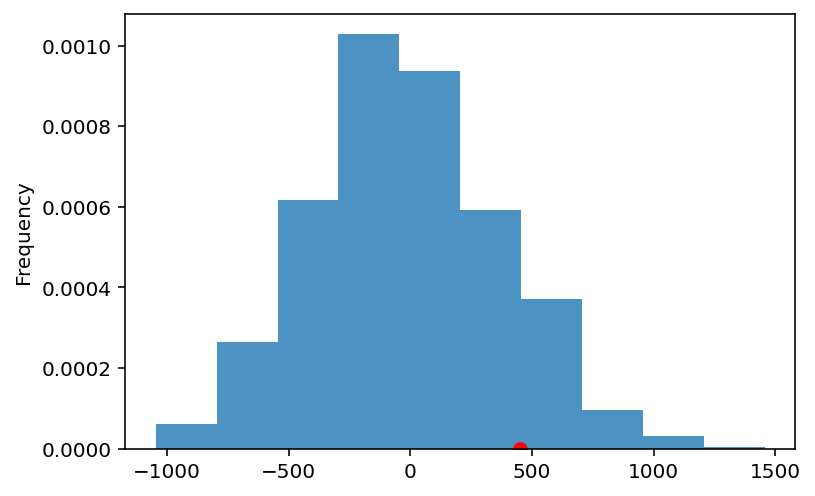

In [29]:
#: visualize
pd.Series(differences).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(obs, 0.0, color='red', s=40, zorder=2);

In [30]:
p_value = np.count_nonzero(np.array(differences) >= obs) / n_repetitions
p_value

0.127

p-value is bigger than 0.05, hence we fail to reject the null hypothesis